In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Image Load

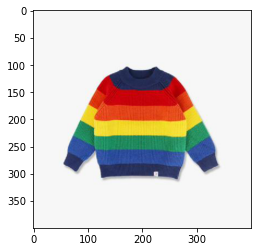

In [3]:
img = Image.open('./sampleImage/rainbow_knit.jpg')
img = img.convert("RGBA")
plt.imshow(img)

# Image backround default

In [4]:
img = img.resize((128, 128))
datas = img.getdata()

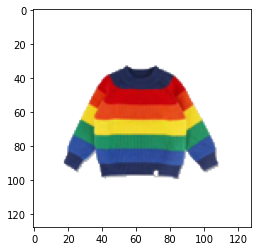

In [5]:
newData = []
cutOff = 200
 
for item in datas:
    if item[0] >= cutOff and item[1] >= cutOff and item[2] >= cutOff:
        newData.append((255, 255, 255, 0))
        # if RGB value is over cutoff, consider as background (white)
    else:
        newData.append(item)
        # don't change others
 
img.putdata(newData)
plt.imshow(img)

In [6]:
img_pixel = pd.DataFrame(np.array(newData))
img_pixel

,0,1,2,3
0,255,255,255,0
1,255,255,255,0
2,255,255,255,0
3,255,255,255,0
4,255,255,255,0
...,...,...,...,...
16379,255,255,255,0
16380,255,255,255,0
16381,255,255,255,0
16382,255,255,255,0


In [7]:
# 투명과 불투명 두 개의 조건 있음
img_pixel[3].unique()

array([  0, 255])

In [8]:
# 투명한 pixel = 배경이므로 drop함.
drop_idx = img_pixel[img_pixel[3] == 0].index
drop_idx

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            16374, 16375, 16376, 16377, 16378, 16379, 16380, 16381, 16382,
            16383],
           dtype='int64', length=12155)

In [9]:
img_pixel = img_pixel.drop(drop_idx)
img_pixel

,0,1,2,3
4278,148,148,166,255
4279,120,121,141,255
4295,146,149,159,255
4296,133,135,152,255
4405,115,120,141,255
...,...,...,...,...
12714,203,203,199,255
12754,196,200,208,255
12755,169,171,185,255
12756,149,149,165,255


In [10]:
# 분석시에 투명도는 사용하지 안으므로 drop함
pixels = img_pixel.drop(columns=[3], axis=1)
pixels

,0,1,2
4278,148,148,166
4279,120,121,141
4295,146,149,159
4296,133,135,152
4405,115,120,141
...,...,...,...
12714,203,203,199
12754,196,200,208
12755,169,171,185
12756,149,149,165


In [11]:
pixels.columns = ['R', 'G', 'B']
pixels

,R,G,B
4278,148,148,166
4279,120,121,141
4295,146,149,159
4296,133,135,152
4405,115,120,141
...,...,...,...
12714,203,203,199
12754,196,200,208
12755,169,171,185
12756,149,149,165


In [12]:
pixels = pixels.reset_index(drop=True)
pixels

,R,G,B
0,148,148,166
1,120,121,141
2,146,149,159
3,133,135,152
4,115,120,141
...,...,...,...
4224,203,203,199
4225,196,200,208
4226,169,171,185
4227,149,149,165


# Clustering - KNN

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [14]:
rgb_data = pd.read_csv('./colorChart/augmented_color_chart_11.csv')
rgb_data

,R,G,B,index
0,57,201,207,0
1,34,181,212,0
2,7,234,183,0
3,38,180,252,0
4,12,228,188,0
...,...,...,...,...
11006,128,0,0,6
11007,0,0,128,7
11008,255,0,0,8
11009,255,255,255,9


In [15]:
X = rgb_data[['R', 'G', 'B']]
y = rgb_data['index']
X

,R,G,B
0,57,201,207
1,34,181,212
2,7,234,183
3,38,180,252
4,12,228,188
...,...,...,...
11006,128,0,0
11007,0,0,128
11008,255,0,0
11009,255,255,255


In [17]:
# training and test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,train_size = 0.7,test_size = 0.3,random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7707, 3) (3304, 3) (7707,) (3304,)


In [18]:
train_score = []
test_score = []

In [19]:
%%time

for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))

CPU times: total: 2.42 s
Wall time: 2.43 s


In [20]:
best_k = test_score.index(max(test_score))
best_k

8

In [21]:
%%time

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 6.99 ms


KNeighborsClassifier(n_neighbors=8)

In [22]:
knn.score(X_train, y_train)

0.9881925522252498

In [23]:
knn.score(X_test, y_test)

0.9872881355932204

# Test image's color pixel if learned model runs properly

In [24]:
from collections import Counter

In [25]:
%%time

pred_color = knn.predict(pixels)
pred_color

CPU times: total: 78.1 ms
Wall time: 85.3 ms


array([9, 7, 9, ..., 9, 9, 9], dtype=int64)

In [26]:
color_counts = Counter(knn.predict(pixels))
color_counts

Counter({9: 178,
         7: 1165,
         1: 401,
         8: 1073,
         6: 33,
         10: 660,
         0: 17,
         4: 673,
         5: 4,
         2: 25})

In [27]:
detected = [i for i in color_counts.keys()]
detected

[9, 7, 1, 8, 6, 10, 0, 4, 5, 2]

In [28]:
colors = ['aqua','black', 'blue', 'fuchsia', 'green', 'lime', 'maroon', 'navy', 'red', 'white', 'yellow']

In [29]:
det_col = []
for i in range(len(detected)):
    det_col.append(colors[detected[i]])
    
det_col

['white',
 'navy',
 'black',
 'red',
 'maroon',
 'yellow',
 'aqua',
 'green',
 'lime',
 'blue']

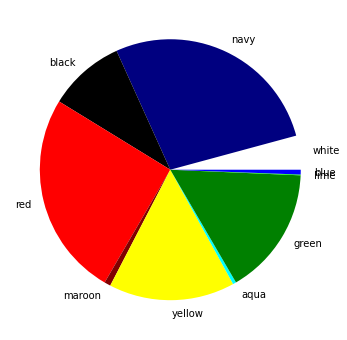

In [30]:
if (True):
    plt.figure(figsize = (8, 6))
    plt.pie(color_counts.values(), labels = det_col, colors=det_col)
    plt.savefig('rainbow_KNN_pie.png')
    plt.show()

In [31]:
predicted = pd.DataFrame(pred_color)
predicted.columns = ['index']
predicted

,index
0,9
1,7
2,9
3,9
4,7
...,...
4224,9
4225,9
4226,9
4227,9


In [32]:
predicted = pixels.join(predicted)
predicted 

,R,G,B,index
0,148,148,166,9
1,120,121,141,7
2,146,149,159,9
3,133,135,152,9
4,115,120,141,7
...,...,...,...,...
4224,203,203,199,9
4225,196,200,208,9
4226,169,171,185,9
4227,149,149,165,9


In [33]:
predicted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4229 entries, 0 to 4228
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   R       4229 non-null   int32
 1   G       4229 non-null   int32
 2   B       4229 non-null   int32
 3   index   4229 non-null   int64
dtypes: int32(3), int64(1)
memory usage: 82.7 KB


In [34]:
pred_col = predicted['index'].to_list()

In [35]:
cols_for_scatter = []

for i in range(len(pred_col)):
    cols_for_scatter.append(colors[pred_col[i]])
    
len(cols_for_scatter)

4229

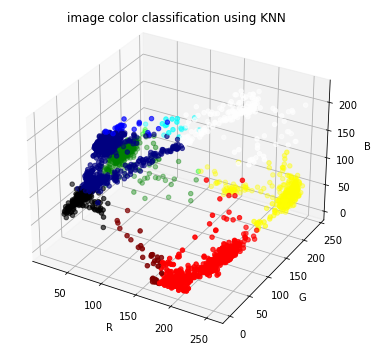

In [36]:
# 이미지 픽셀값 분포 scatter
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 1, 1, projection='3d')

ax.scatter(predicted['R'], predicted['G'], predicted['B'], c = cols_for_scatter);
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
ax.set_title('image color classification using KNN', y=1.02)

plt.tight_layout()
plt.savefig(f'KNN_color_classify_rainbow.png')
plt.show()

In [37]:
max(color_counts.values())

1165

In [38]:
for k, v in color_counts.items():
    if v == max(color_counts.values()):
        max_idx = k
        
max_idx

7

# Finding the most significant color

In [39]:
html = pd.read_csv('../colorChart/colorChart_11.csv')
html

,index,name,R,G,B
0,0,aqua,0,255,255
1,1,black,0,0,0
2,2,blue,0,0,255
3,3,fuchsia,255,0,255
4,4,green,0,128,0
5,5,lime,0,255,0
6,6,maroon,128,0,0
7,7,navy,0,0,128
8,8,red,255,0,0
9,9,white,255,255,255


In [40]:
max_idx

7

In [41]:
html[html['index'] == max_idx]['name']

7    navy
Name: name, dtype: object